In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

from part_g import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from part_a import *
from part_b import *
from part_c import *
from part_e import *
from part_f import *


path: str = os.path.join('..', 'DataFiles', 'SRTM_data_Norway_1.tif')


In [60]:
np = 60
degree =12
scaling = "standard"
# scaling = None
lambda_ridge = 0.1  
alpha_lasso = 0.00158 


tif_file = path
subset_rows, subset_cols = np, np
xy, z_flat, valid_mask, z_shape = read_and_preprocess_terrain(tif_file, subset_rows, subset_cols)
z_reshaped_origin = z_flat.reshape((subset_rows, subset_cols))

### Part g_a

Running OLS on Franke's function up to degree 12.
Scaling method: standard
Adding noise: True
Number of samples: 20
Max degree 12: Train MSE=0.0891, Train R²=0.9109, Test MSE=0.0948, Test R²=0.9040


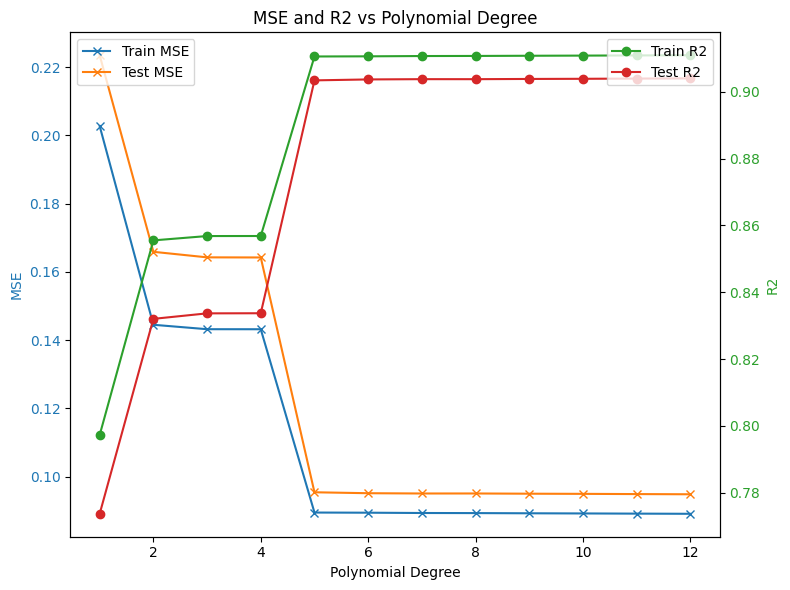

In [61]:
# (z_pred, z_train_pred, z_test_pred, z, z_train, z_test),\
# beta,\
# train_mse,\
# train_r2,\
# test_mse,\
# test_r2=ols_on_ff_evaluation(xy=xy,z=z_flat,degrees=degree,scaling=scaling)

mse_train, r2_train, mse_test, r2_test, betas = ols_on_ff_evaluation(xy=xy, z=z_flat, degrees=degree, scaling=scaling)

visualize_ols_metrics(mse_train, r2_train, mse_test, r2_test)

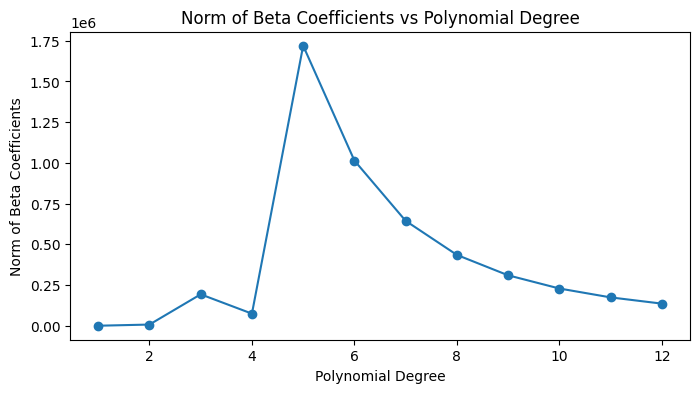

In [62]:
visualize_betas_norm_ols(betas)

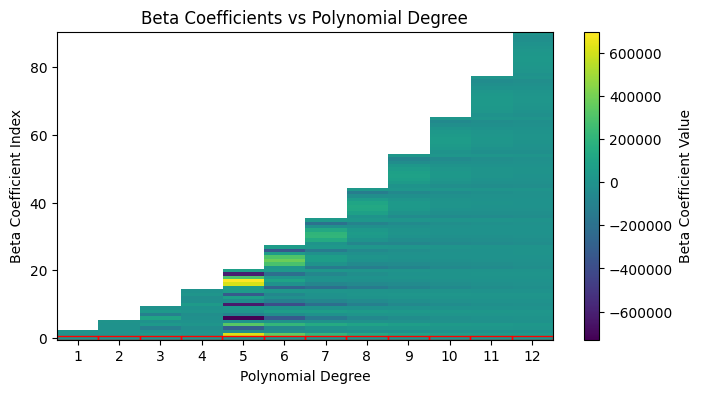

In [63]:
visualize_beta_histogram_ols(betas)

### Part g_b

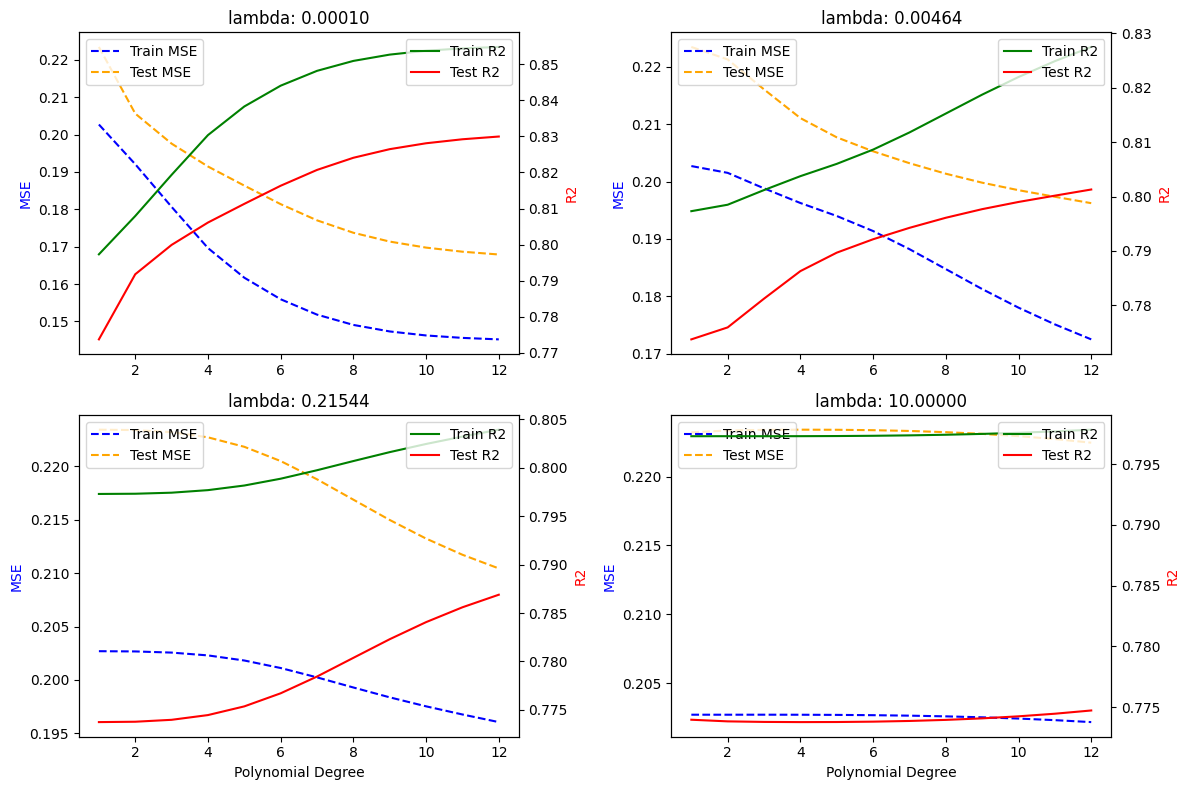

In [64]:
from utils import *
mse_train, r2_train, mse_test, r2_test,alphas, betas = ridge_on_ff_evaluation(xy=xy, z=z_flat, degrees=degree, scaling=scaling)

visualize_evaluation_metrics(mse_train, r2_train, mse_test, r2_test, alphas)

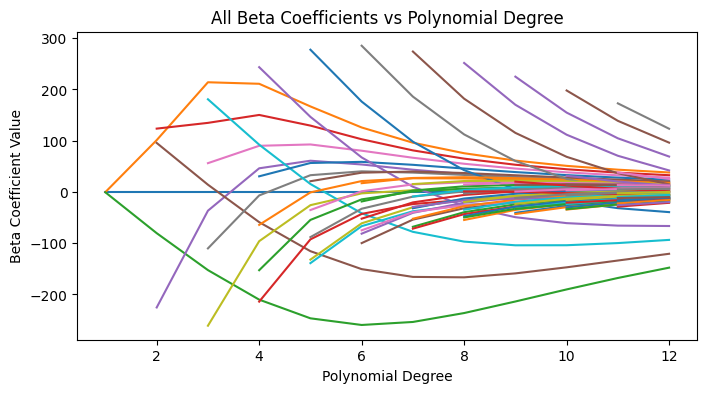

alpha: 0.0001


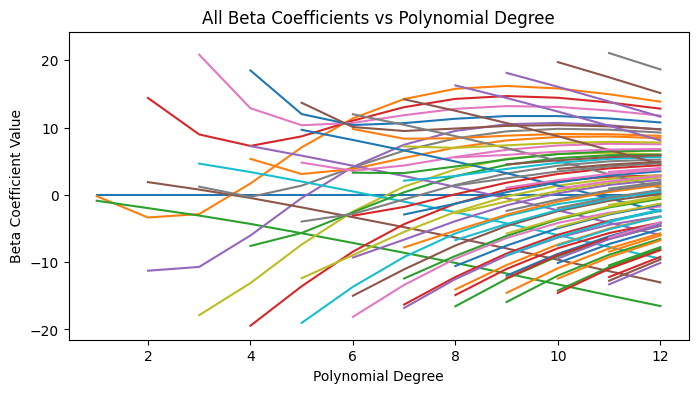

alpha: 0.004641588833612782


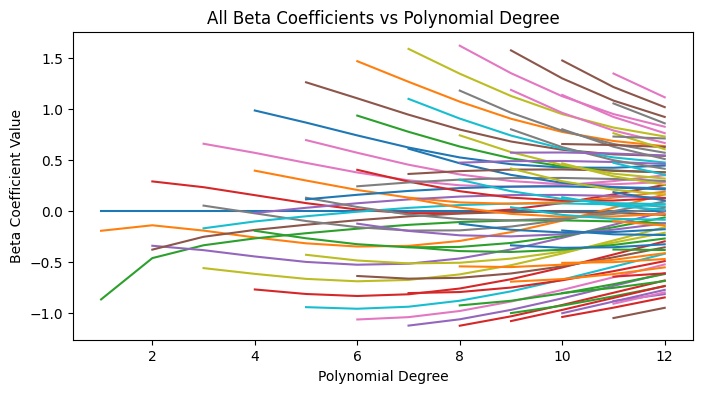

alpha: 0.21544346900318845


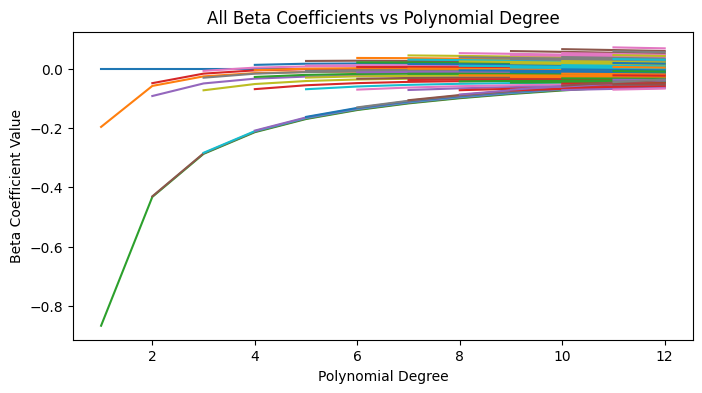

alpha: 10.0


In [65]:
from plot import *
for i in range(len(alphas)):
    visualize_all_betas(betas[i])
    print(f"alpha: {alphas[i]}")


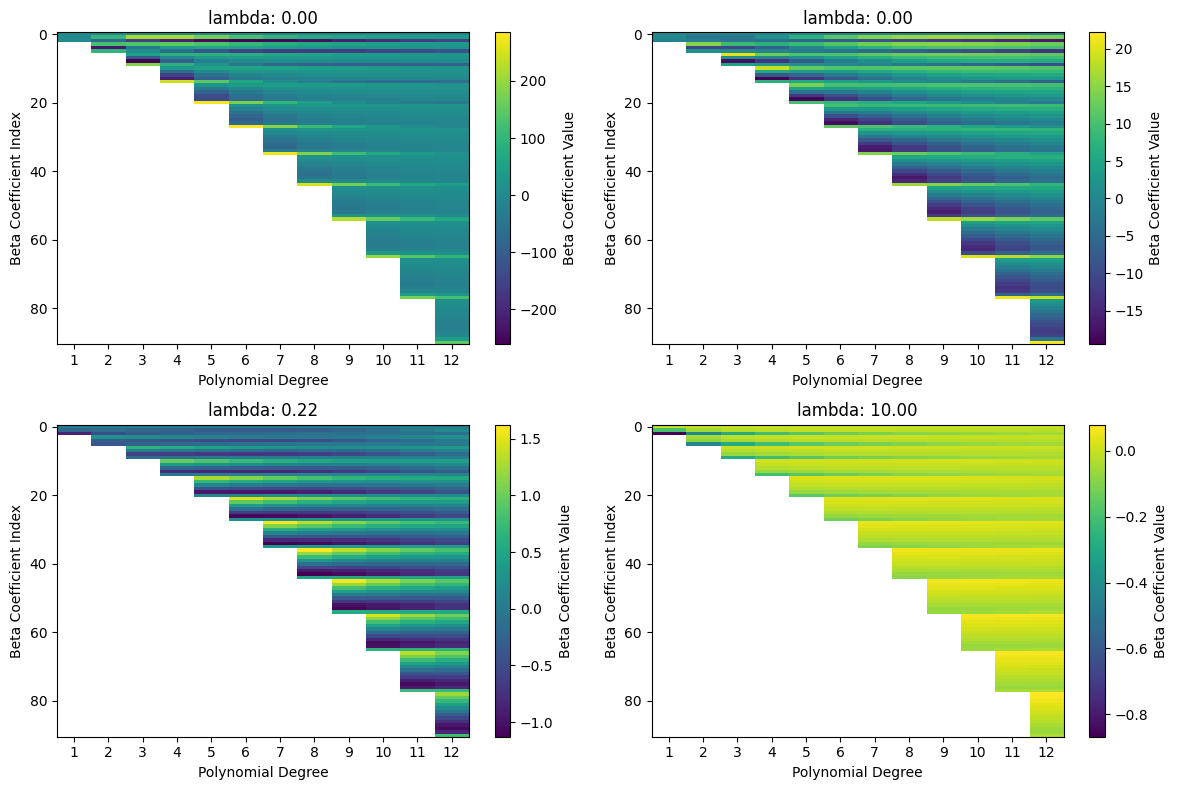

In [66]:
visualize_beta_histogram_ridge(betas, alphas)

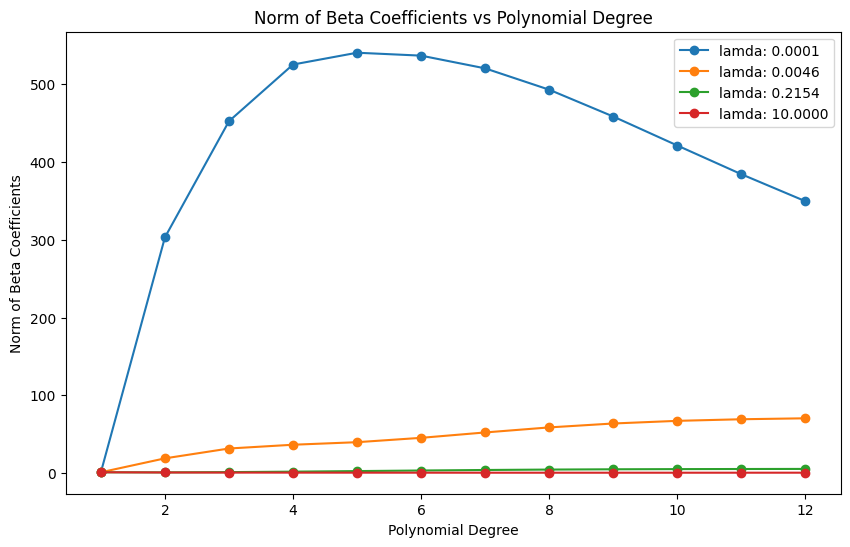

In [67]:
visualize_betas_norm_ridge(betas, alphas)

## Part g_c

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.105e+01, tolerance: 2.880e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.924e+01, tolerance: 2.880e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

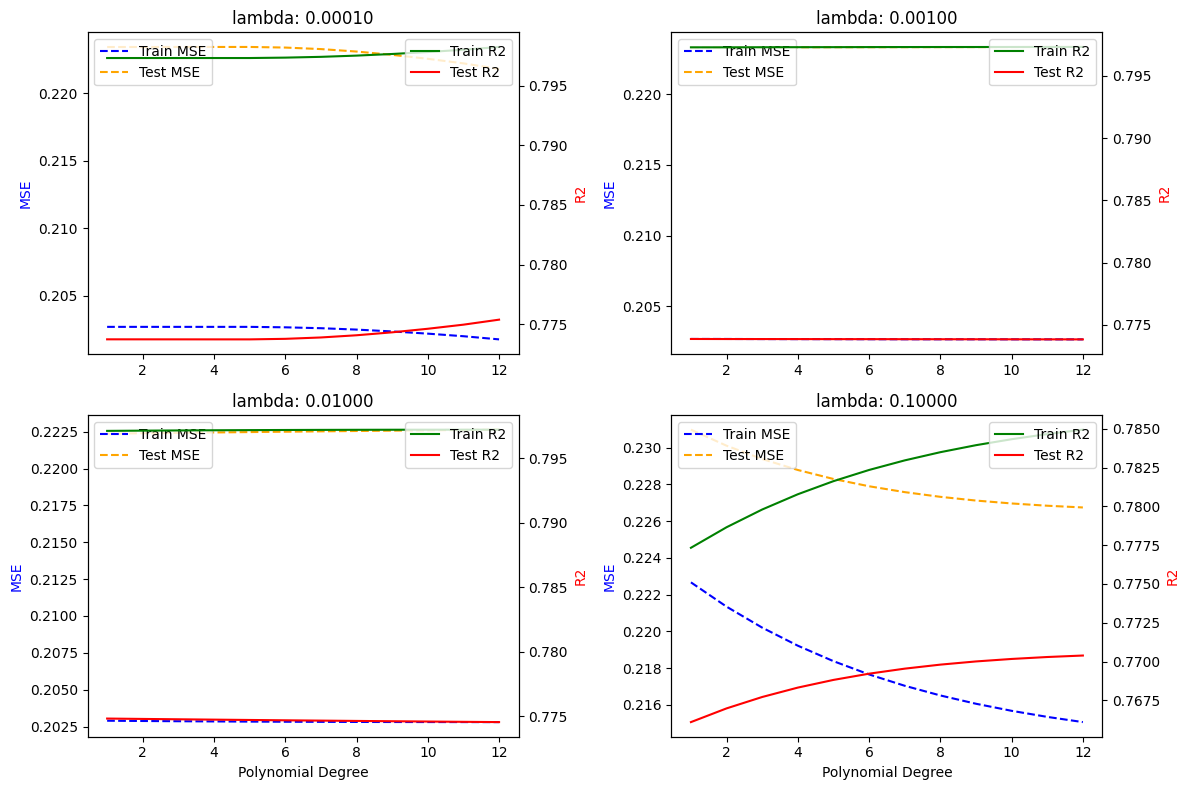

In [68]:
mse_train, r2_train, mse_test, r2_test,alphas, betas = lasso_on_ff_evaluation(xy=xy, z=z_flat, degrees=degree, scaling=scaling)

visualize_evaluation_metrics(mse_train, r2_train, mse_test, r2_test, alphas)

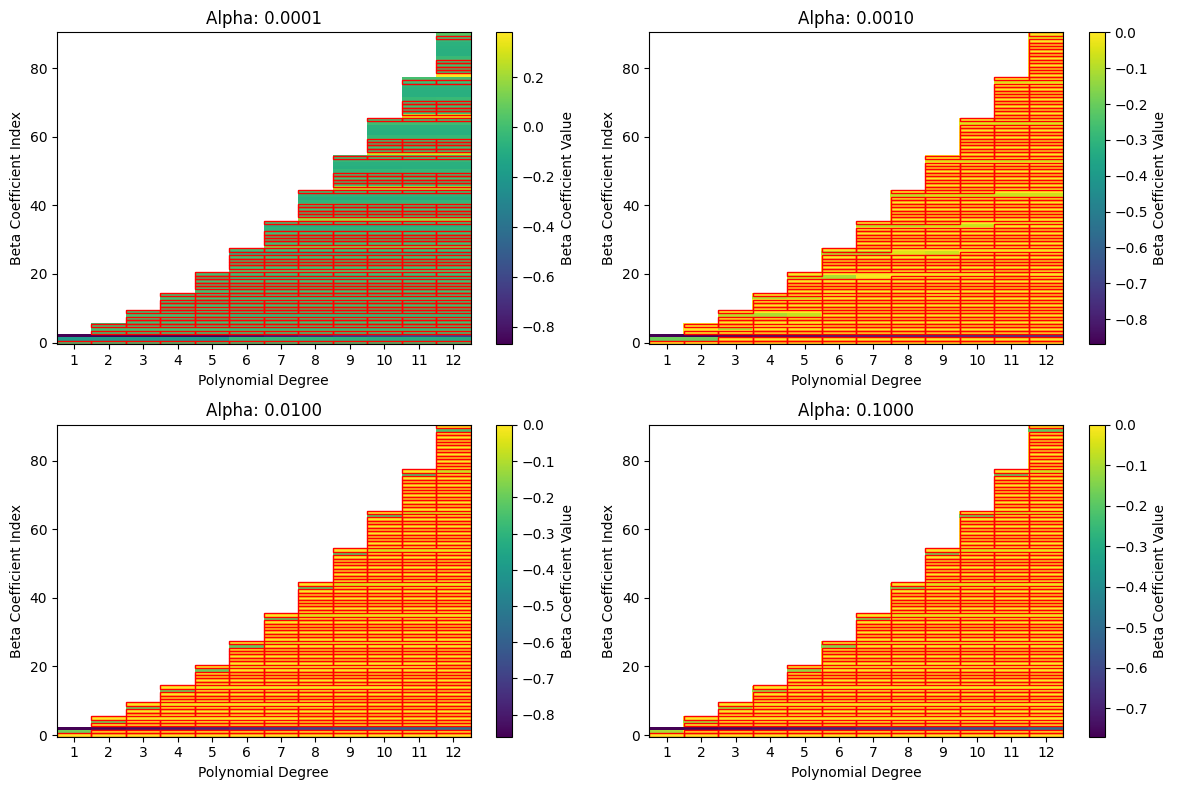

In [69]:
visualize_lasso_beta_histogram(betas, alphas)

**The Red areas are zero coefficients**

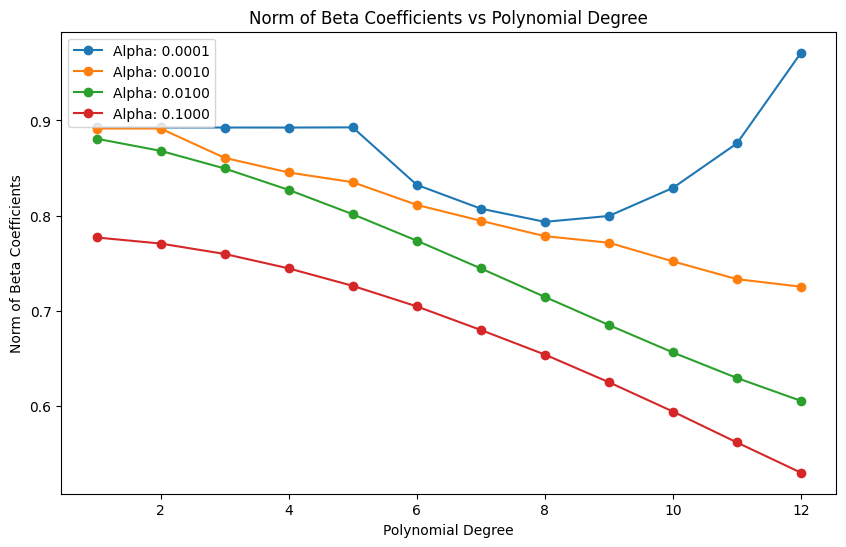

In [70]:
visualize_lasso_betas_norm(betas, alphas)

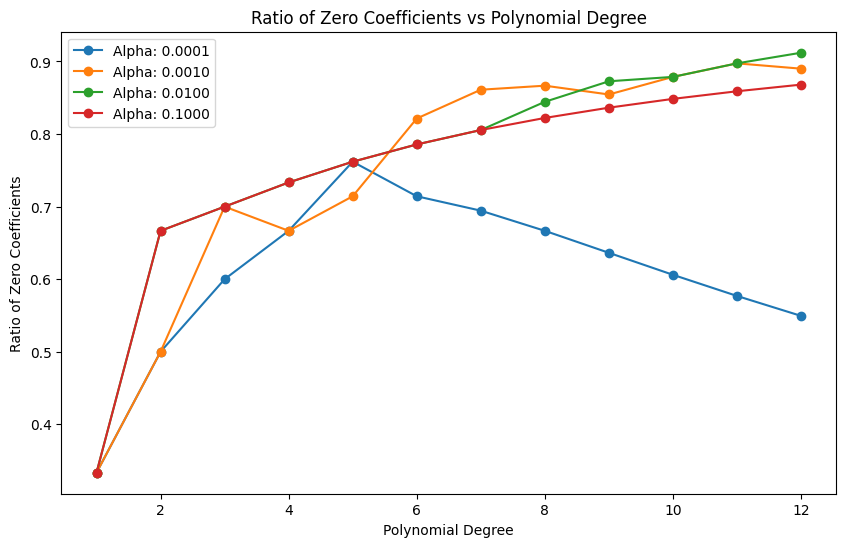

In [71]:
visualize_zero_coefficients(betas, alphas)

**The ration is defined as totalnumber of zero coefficients/total number of coefficients**

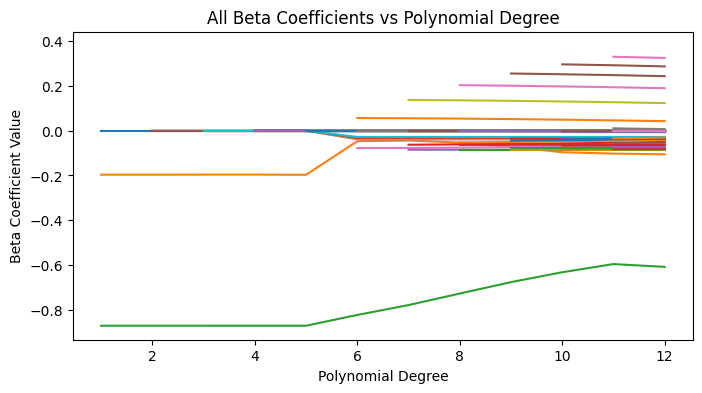

alpha: 0.0001


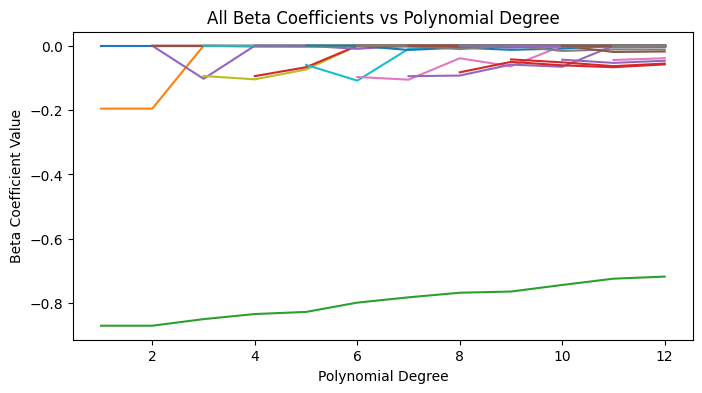

alpha: 0.001


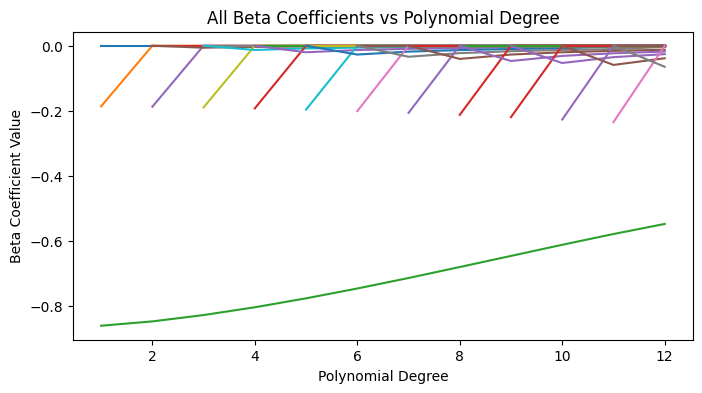

alpha: 0.01


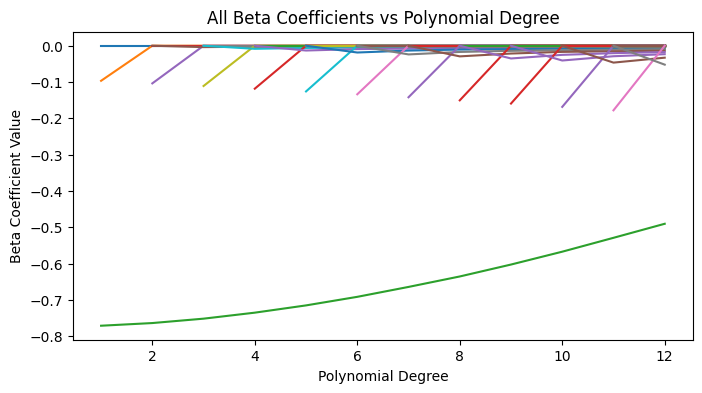

alpha: 0.1


In [72]:
for i in range(len(alphas)):
    visualize_all_betas(betas[i])
    print(f"alpha: {alphas[i]}")

## Bias variance tradeoff using bootstrap



Degree 1: Bias^2 = 0.2232, Variance = 0.0002, MSE = 0.2235
Degree 2: Bias^2 = 0.1656, Variance = 0.0005, MSE = 0.1660
Degree 3: Bias^2 = 0.1640, Variance = 0.0005, MSE = 0.1645
Degree 4: Bias^2 = 0.1640, Variance = 0.0005, MSE = 0.1645
Degree 5: Bias^2 = 0.0951, Variance = 0.0004, MSE = 0.0954
Degree 6: Bias^2 = 0.0950, Variance = 0.0003, MSE = 0.0954
Degree 7: Bias^2 = 0.0950, Variance = 0.0003, MSE = 0.0953
Degree 8: Bias^2 = 0.0949, Variance = 0.0003, MSE = 0.0953
Degree 9: Bias^2 = 0.0949, Variance = 0.0003, MSE = 0.0952
Degree 10: Bias^2 = 0.0948, Variance = 0.0003, MSE = 0.0952
Degree 11: Bias^2 = 0.0948, Variance = 0.0003, MSE = 0.0951
Degree 12: Bias^2 = 0.0947, Variance = 0.0003, MSE = 0.0950


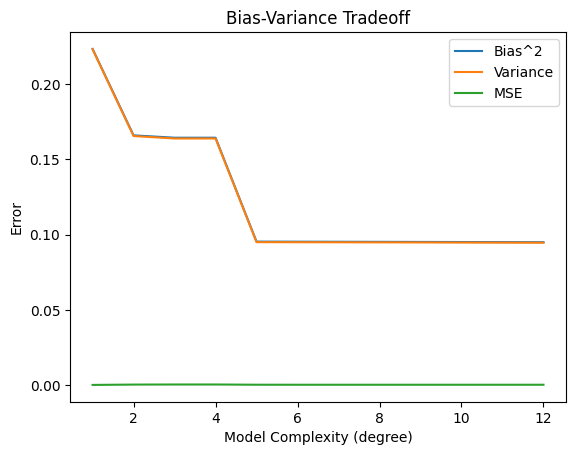

In [73]:
biases, variances, mses= bias_variance(xy=xy, z=z_flat, degree=degree, scaling=scaling)
visualize_bias_variance(mses, biases, variances)

## Cros validation and bootstrapping

Running Bias-Variance Decomposition for OLS:
Degree 1: Bias^2 = 0.2232, Variance = 0.0002, MSE = 0.2235
Degree 2: Bias^2 = 0.1656, Variance = 0.0005, MSE = 0.1660
Degree 3: Bias^2 = 0.1640, Variance = 0.0005, MSE = 0.1645
Degree 4: Bias^2 = 0.1640, Variance = 0.0005, MSE = 0.1645
Degree 5: Bias^2 = 0.0951, Variance = 0.0004, MSE = 0.0954
Degree 6: Bias^2 = 0.0950, Variance = 0.0003, MSE = 0.0954
Degree 7: Bias^2 = 0.0950, Variance = 0.0003, MSE = 0.0953
Degree 8: Bias^2 = 0.0949, Variance = 0.0003, MSE = 0.0953
Degree 9: Bias^2 = 0.0949, Variance = 0.0003, MSE = 0.0952
Degree 10: Bias^2 = 0.0948, Variance = 0.0003, MSE = 0.0952
Degree 11: Bias^2 = 0.0948, Variance = 0.0003, MSE = 0.0951
Degree 12: Bias^2 = 0.0947, Variance = 0.0003, MSE = 0.0950

Running k-Fold Cross-Validation:
Processing Fold 1/10
Processing Fold 2/10
Processing Fold 3/10
Processing Fold 4/10
Processing Fold 5/10
Processing Fold 6/10
Processing Fold 7/10
Processing Fold 8/10
Processing Fold 9/10
Processing Fold 10/10

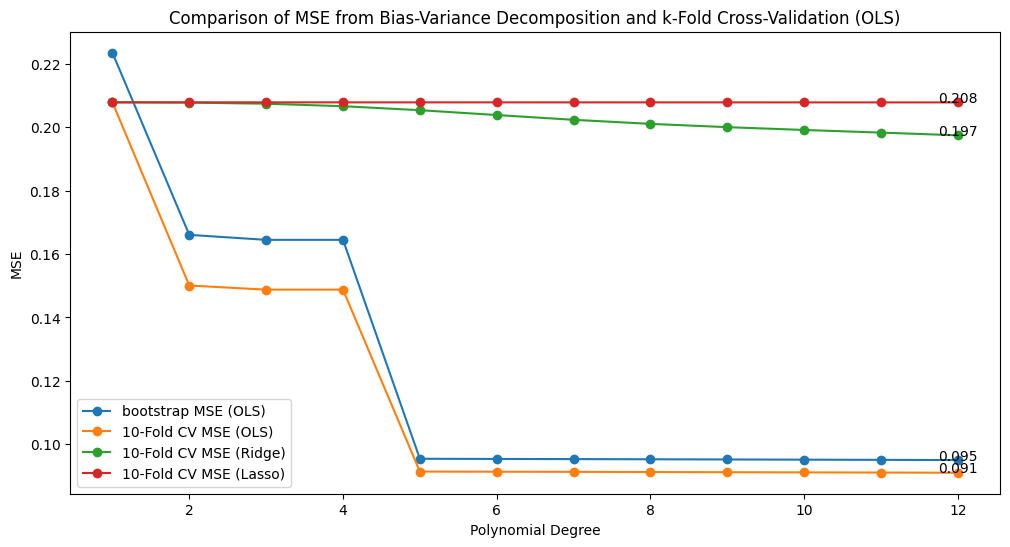

In [74]:
z_pred = compare_CV_bootstrap(xy=xy, z=z_flat, degree=degree, scaling=scaling, alphas={"ridge": lambda_ridge, "lasso": alpha_lasso}, return_z_pred=True)

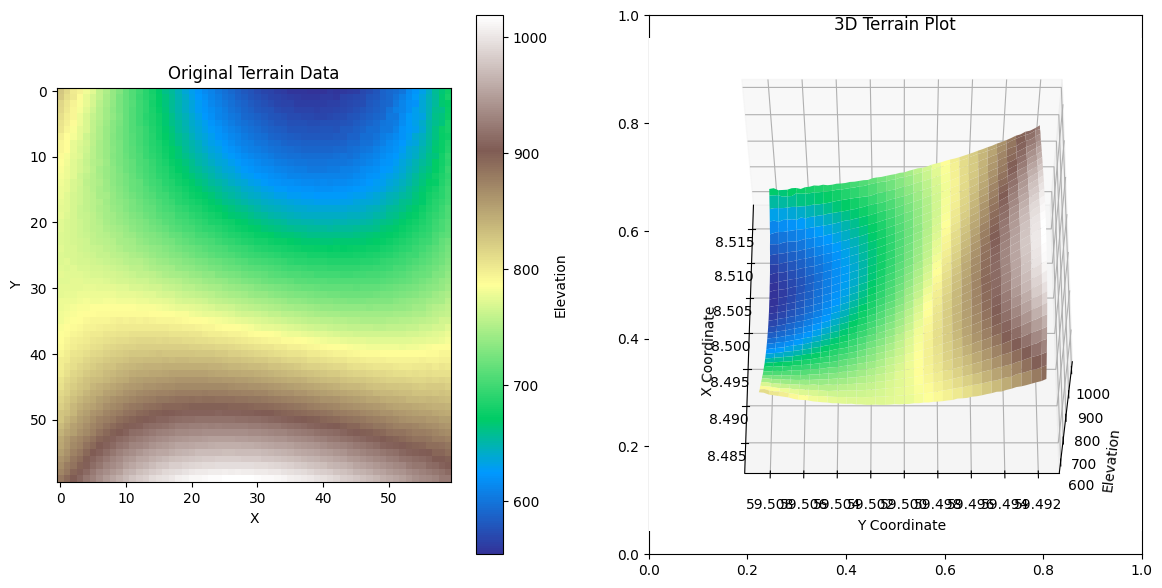

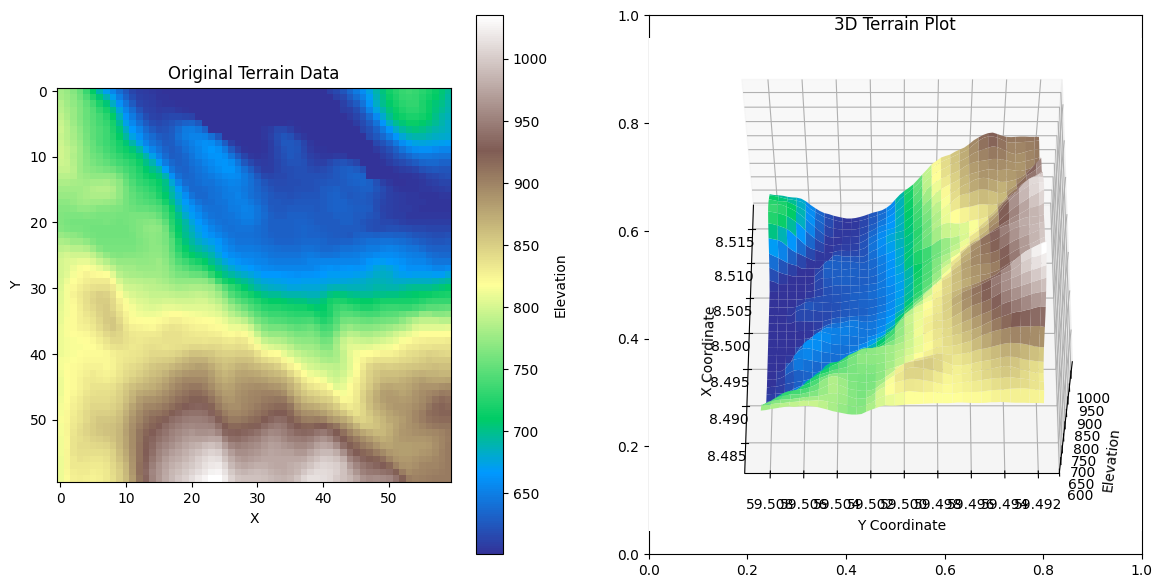

In [75]:
z_ols_bootstrap = z_pred["cv_ols"].reshape((subset_rows, subset_cols))
plot_terrain_data(xy=xy,z_reshaped_origin=z_ols_bootstrap,subset_cols=subset_cols,subset_rows=subset_rows)
plot_terrain_data(xy=xy,z_reshaped_origin=z_reshaped_origin,subset_cols=subset_cols,subset_rows=subset_rows)

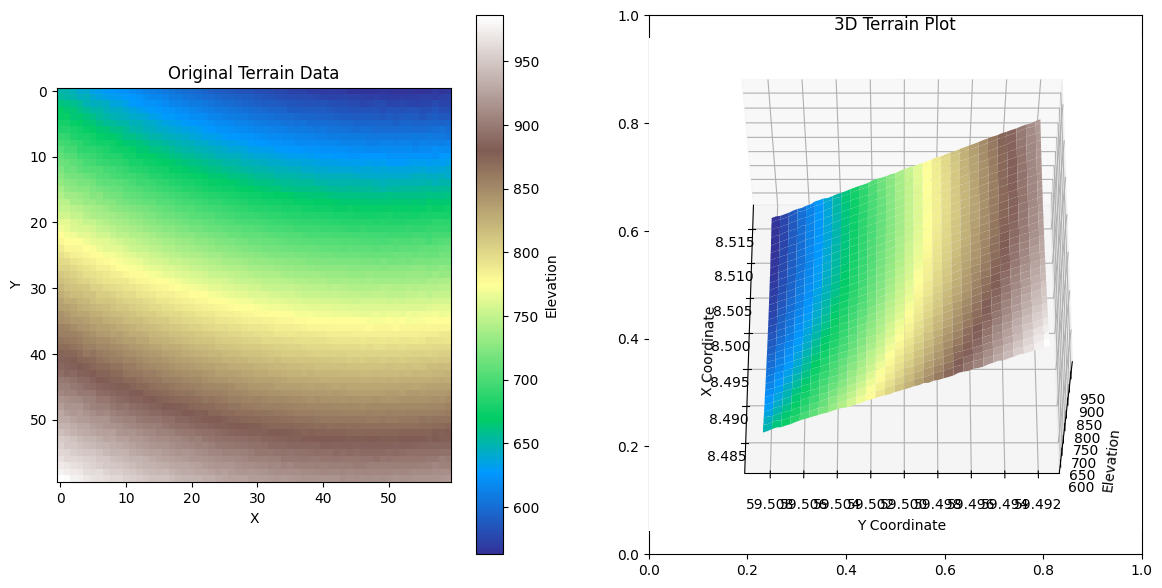

In [76]:
z_pred_ridge = z_pred["cv_ridge"].reshape((subset_rows, subset_cols))

plot_terrain_data(xy=xy,z_reshaped_origin=z_pred_ridge,subset_cols=subset_cols,subset_rows=subset_rows)

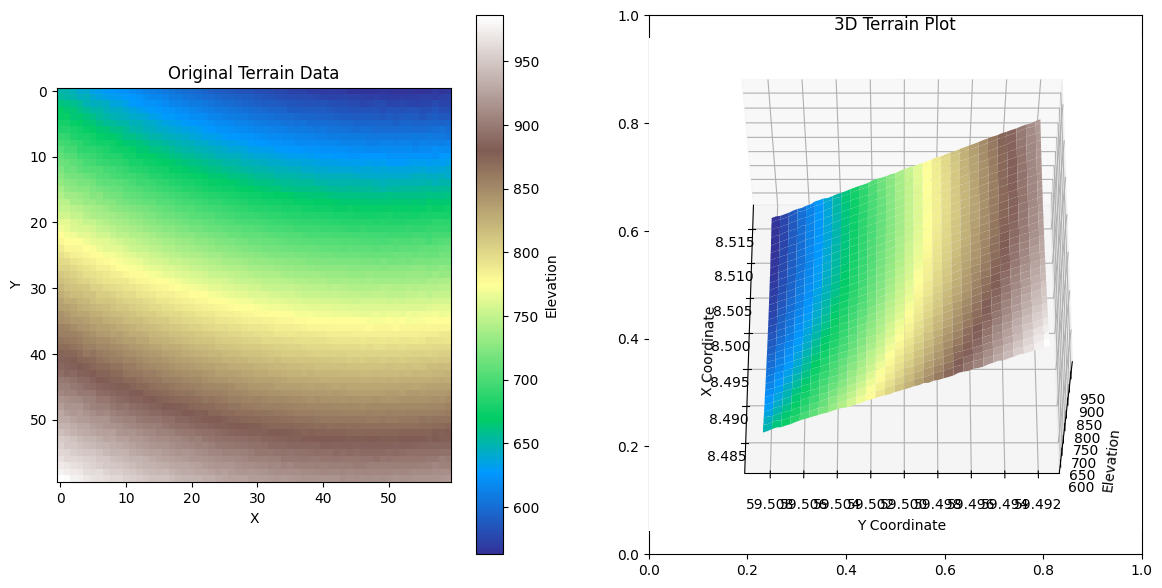

In [77]:
z_pred_lasso = z_pred["cv_lasso"].reshape((subset_rows, subset_cols))

plot_terrain_data(xy=xy,z_reshaped_origin=z_pred_ridge,subset_cols=subset_cols,subset_rows=subset_rows)

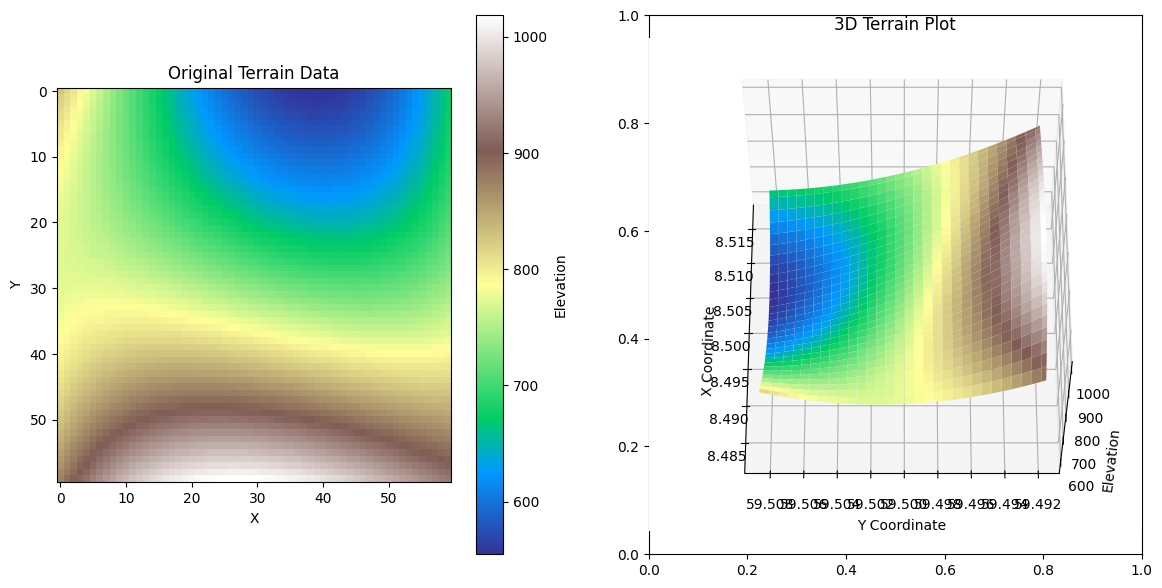

In [78]:
z_pred_ols_bootstrap = z_pred["bootstrap_ols"].reshape((subset_rows, subset_cols))

plot_terrain_data(xy=xy,z_reshaped_origin=z_pred_ols_bootstrap,subset_cols=subset_cols,subset_rows=subset_rows)
